In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
from functions import generateDfFromMongoDB

In [3]:
host = "mongodb://localhost"
port = 27017
db = "20221114"
collection = "sensordata"
query = {}
resultsLimit = 80000

df = generateDfFromMongoDB(host, collection, port, db, resultsLimit)

In [4]:
df.head()

,_id,Sensor address,sensor_id,humidity,temperature,vdd,waterleak,time,outside temperature (TF),outside relativeHumidity (TF),precipitation (TF),precipitation type (TF),light,motion
0,63728011caf3517df237c199,Matsal Addiva Sigurdsgatan,eui-a81758fffe075c91,36,21.9,3624,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
1,63728011caf3517df237c19a,Pingisrum Addiva Sigurdsgatan,eui-a81758fffe075b65,37,22.2,3629,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
2,637280a2caf3517df237c19b,Skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b66,36,22.3,3633,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
3,637280a2caf3517df237c19c,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.9,3636,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
4,6372848c679d686ec9534093,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.8,3636,0.0,"2022/11/14, 19:10:20",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN


In [5]:
df = df.drop(columns="_id")
df.head()

,Sensor address,sensor_id,humidity,temperature,vdd,waterleak,time,outside temperature (TF),outside relativeHumidity (TF),precipitation (TF),precipitation type (TF),light,motion
0,Matsal Addiva Sigurdsgatan,eui-a81758fffe075c91,36,21.9,3624,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
1,Pingisrum Addiva Sigurdsgatan,eui-a81758fffe075b65,37,22.2,3629,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
2,Skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b66,36,22.3,3633,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
3,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.9,3636,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
4,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.8,3636,0.0,"2022/11/14, 19:10:20",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN


In [6]:
df.dtypes

Sensor address                    object
sensor_id                         object
humidity                           int64
temperature                      float64
vdd                                int64
waterleak                        float64
time                              object
outside temperature (TF)         float64
outside relativeHumidity (TF)    float64
precipitation (TF)                object
precipitation type (TF)           object
light                            float64
motion                           float64
dtype: object

In [7]:
df.head()

,Sensor address,sensor_id,humidity,temperature,vdd,waterleak,time,outside temperature (TF),outside relativeHumidity (TF),precipitation (TF),precipitation type (TF),light,motion
0,Matsal Addiva Sigurdsgatan,eui-a81758fffe075c91,36,21.9,3624,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
1,Pingisrum Addiva Sigurdsgatan,eui-a81758fffe075b65,37,22.2,3629,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
2,Skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b66,36,22.3,3633,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
3,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.9,3636,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN
4,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.8,3636,0.0,"2022/11/14, 19:10:20",6.8,98.7,0.0,Ingen nederbörd,NaN,NaN


In [8]:
     
le = LabelEncoder()
le.fit(df["sensor_id"])
df["sensor_id"] = le.transform(df["sensor_id"])
le.fit(df["Sensor address"])
df["Sensor address"] = le.transform(df["Sensor address"])
le.fit(df["time"])
df["time"] = le.transform(df["time"])
le.fit(df["precipitation type (TF)"])
df["precipitation type (TF)"] = le.transform(df["precipitation type (TF)"])




df = df.drop(columns="light")
df = df.drop(columns="motion")
df = df.drop(columns="Sensor address")
df = df.drop(columns="precipitation (TF)")
df = df.drop(columns="vdd")
df = df.drop(columns="waterleak")


df = df.dropna()
df.head()

,sensor_id,humidity,temperature,time,outside temperature (TF),outside relativeHumidity (TF),precipitation type (TF)
0,4,36,21.9,0,6.8,98.7,0
1,1,37,22.2,0,6.8,98.7,0
2,2,36,22.3,1,6.8,98.7,0
3,3,29,25.9,1,6.8,98.7,0
4,3,29,25.8,2,6.8,98.7,0


In [9]:
df.dtypes

sensor_id                          int32
humidity                           int64
temperature                      float64
time                               int32
outside temperature (TF)         float64
outside relativeHumidity (TF)    float64
precipitation type (TF)            int32
dtype: object

In [10]:
df_X = df.drop(columns="temperature")
df_y = df["temperature"] *10

#df.loc[:, 'quantity'] = df['quantity'] * 100
#df_y["temperature"]=df_y["temperature"] * 100
df_y=df_y.astype('int')

In [11]:
df_y.head()

0    219
1    222
2    223
3    259
4    258
Name: temperature, dtype: int32

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)


In [13]:
import time

In [14]:
start4 = time.time()
clf4  = MLPClassifier(random_state=42,learning_rate_init=0.001,hidden_layer_sizes=(100,100,100,100,100,100,100))
clf4.fit(X_train, y_train)
y_predict_clf4  = clf4.predict(X_test)
end4 = time.time()
print('Time taken for clf4 program: ', end4 - start4)

Time taken for clf4 program:  37.918015480041504


c:\Users\robba\OneDrive\Skrivbord\Programmering\Python\Addiva\mqtt test\evn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
clf4.score(X_test, y_test)

0.570506454816286

In [16]:
predictions = clf4.predict(X_test)

In [17]:
sample = X_test.iloc[5:6]
sample["sensor_id"] = 1.0
sample["humidity"] = 29.0
sample["outside temperature (TF)"] = 3.2
sample["outside relativeHumidity (TF)"] = 78.7
sample["precipitation type (TF)"] = 0.0
sample["time"] = 9999.0
sample

C:\Users\robba\AppData\Local\Temp\ipykernel_1252\3503191331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["sensor_id"] = 1.0
C:\Users\robba\AppData\Local\Temp\ipykernel_1252\3503191331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["humidity"] = 29.0
C:\Users\robba\AppData\Local\Temp\ipykernel_1252\3503191331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,sensor_id,humidity,time,outside temperature (TF),outside relativeHumidity (TF),precipitation type (TF)
2107,1.0,29.0,9999.0,3.2,78.7,0.0


In [18]:
X_test

,sensor_id,humidity,time,outside temperature (TF),outside relativeHumidity (TF),precipitation type (TF)
2748,1,28,1076,0.7,91.0,6
6273,4,28,2167,0.8,62.4,0
2034,2,23,898,2.1,80.8,0
5927,2,28,1993,1.0,70.0,0
3340,0,32,1226,0.5,91.7,0
...,...,...,...,...,...,...
5465,3,27,1762,1.3,74.3,6
3023,4,29,1145,0.2,90.0,0
3907,1,25,1371,-0.5,92.2,0
1049,1,30,530,1.8,81.7,6


In [19]:
predictions

array([218, 214, 220, ..., 213, 217, 222])

In [20]:
traffsakerhet = accuracy_score(y_test,predictions)

In [21]:
print(f'Vår träffsäkerhet för modellen är: {traffsakerhet * 100}%')

Vår träffsäkerhet för modellen är: 57.05064548162861%


In [22]:
cm = confusion_matrix(y_test,predictions)
cm

array([[  0,   2,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,  12,   0,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   8,   3,  27,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   1,   3,  66,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,  14,  94,  12,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   1,   0,   1,  48,  63,   8,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    

Text(120.72222222222221, 0.5, 'Acctual Temp')

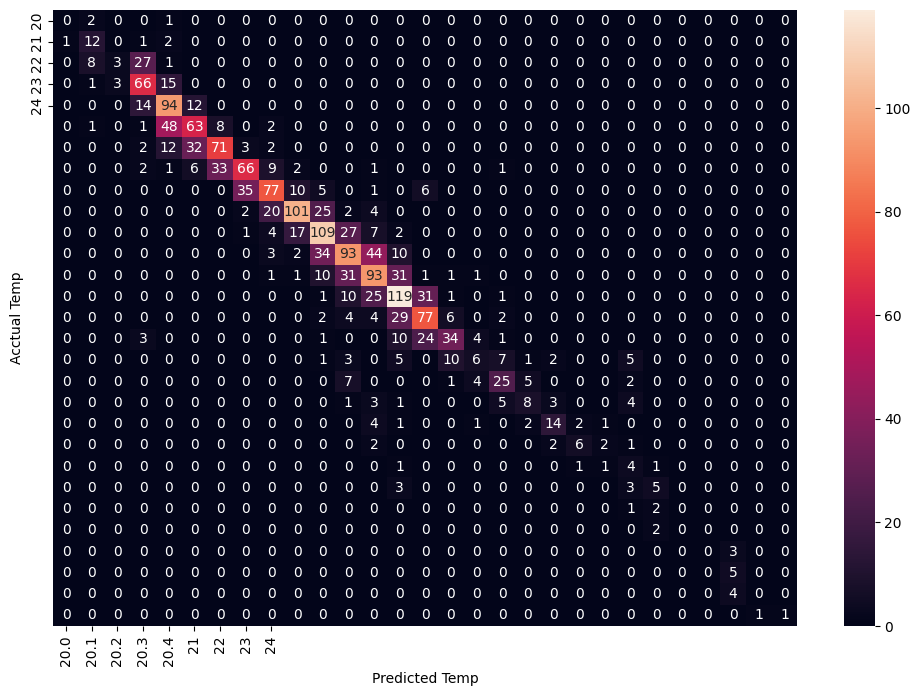

In [23]:
xticklabels = ['20.0','20.1','20.2','20.3','20.4', '21', "22", "23", "24"]
yticklabels = ['20', '21', "22", "23", "24"]
plt.figure(figsize=(12,8))
sns.heatmap(cm,xticklabels = xticklabels,
yticklabels = yticklabels, annot=True, fmt='g')
plt.xlabel('Predicted Temp')
plt.ylabel('Acctual Temp')

In [24]:
sample.head()

,sensor_id,humidity,time,outside temperature (TF),outside relativeHumidity (TF),precipitation type (TF)
2107,1.0,29.0,9999.0,3.2,78.7,0.0


In [25]:
prediction_sample = clf4.predict(sample)
prediction_sample

array([221])